## Distributions

In the first chapter, having cleaned and validated your data, you began exploring it by using histograms to visualize distributions. In this chapter, you'll learn how to represent distributions using Probability Mass Functions (PMFs) and Cumulative Distribution Functions (CDFs). You'll learn when to use each of them, and why, while working with a new dataset obtained from the General Social Survey.

### Distribution of income
In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's np.log10() function.

Then, you'll use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function.

In [16]:
# import data
import pandas as pd

gss = pd.read_hdf('gss.hdf5')

# Extract realinc and compute its log
import numpy as np
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

4.371148677933652 0.4290082383271419


### CDFs
dist is a scipy.stats.norm object with the same mean and standard deviation as the data. It provides .cdf(), which evaluates the normal cumulative distribution function.

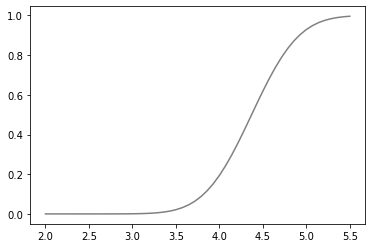

In [26]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

### Comparing PDFs
In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. That's what you'll do in this exercise!

As before, the norm object dist is available in your workspace:

from scipy.stats import norm
dist = norm(mean, std)
Just as all norm objects have a .cdf() method, they also have a .pdf() method.

To create a KDE plot, you can use Seaborn's kdeplot() function. 

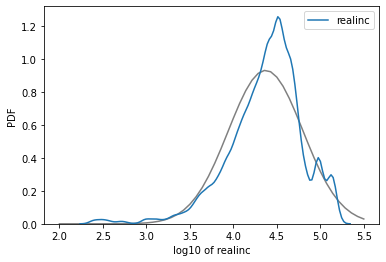

In [27]:
import seaborn as sns
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()